In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import random
import time
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib

# National GB Demand, Wind, PV - 2022

In [4]:
Demand_Data = pd.read_csv('demanddata.csv').values[:,2] #2022-01-01 to 2022-12-31
WT_Data = pd.read_csv('GenerationbyFuelType_2022.csv').values[:,7] #2022-01-01 to 2022-12-31
PV_Data = pd.read_csv('PV_Live Historical Results.csv').values[:,-1] * 13861.203

In [5]:
Demand_Data_Day_Hour = np.reshape(Demand_Data, [365,48])
WT_Data_Day_Hour = np.reshape(WT_Data, [365,48])
PV_Data_Day_Hour = np.array(np.reshape(PV_Data, [365,48])[::-1], dtype='float')

# Summer(Jun-Aug), Winter(Dec-Feb) 

In [6]:
Demand_Summer_Hour = Demand_Data_Day_Hour[151:243,:]
WT_Summer_Hour = WT_Data_Day_Hour[151:243,:]
PV_Summer_Hour = PV_Data_Day_Hour[151:243,:]
Demand_Winter_Hour = np.concatenate((Demand_Data_Day_Hour[:59,:], Demand_Data_Day_Hour[-31:,:]), axis=0)
WT_Winter_Hour = np.concatenate((WT_Data_Day_Hour[:59,:], WT_Data_Day_Hour[-31:,:]), axis=0)
PV_Winter_Hour = np.concatenate((PV_Data_Day_Hour[:59,:], PV_Data_Day_Hour[-31:,:]), axis=0)

In [7]:
Demand_Summer_Daily_Mean = np.mean(Demand_Summer_Hour, axis=0)
WT_Summer_Daily_Mean = np.mean(WT_Summer_Hour, axis=0)
PV_Summer_Daily_Mean = np.mean(PV_Summer_Hour, axis=0)
Demand_Winter_Daily_Mean = np.mean(Demand_Winter_Hour, axis=0)
WT_Winter_Daily_Mean = np.mean(WT_Winter_Hour, axis=0)
PV_Winter_Daily_Mean = np.mean(PV_Winter_Hour, axis=0)

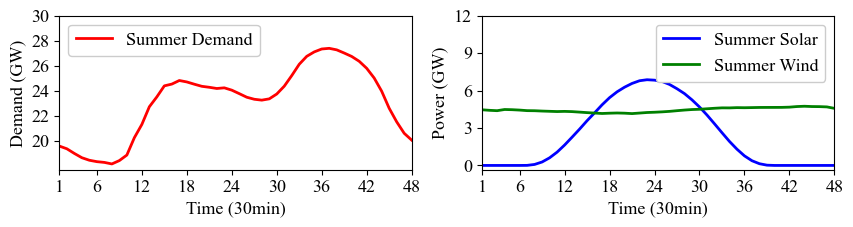

In [8]:
plt.figure(figsize=(10, 2))
x = range(48)
text1 = 13
text2 = 13
font1 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text2}

plt.subplot(121)
plt.plot(x, Demand_Summer_Daily_Mean, linewidth=2, color='r', label='Summer Demand')
plt.tick_params(labelsize = text1)
plt.xlim(0,47)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],[1,6,12,18,24,30,36,42,48])
plt.yticks(np.linspace(20000,30000,6), fontname = "Times New Roman")
plt.yticks([20000,22000,24000,26000,28000,30000],[20,22,24,26,28,30])
plt.xlabel('Time (30min)', font1)
plt.ylabel("Demand (GW)", font1)
legend = plt.legend(loc='upper left', prop=font1, framealpha=1, ncol=1)

plt.subplot(122)
plt.plot(x, PV_Summer_Daily_Mean, linewidth=2, color='b', label='Summer Solar')
plt.plot(x, WT_Summer_Daily_Mean, linewidth=2, color='g', label='Summer Wind')
plt.tick_params(labelsize = text1)
plt.xlim(0,47)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],[1,6,12,18,24,30,36,42,48])
plt.yticks(np.linspace(0,12000,5), fontname = "Times New Roman")
plt.yticks([0,3000,6000,9000,12000],[0,3,6,9,12])
plt.xlabel('Time (30min)', font1)
plt.ylabel("Power (GW)", font1)
legend = plt.legend(loc='upper right', prop=font1, framealpha=1, ncol=1)

plt.savefig('GBDemWTPV_Summer.jpg', dpi=1800, bbox_inches='tight')
plt.show()

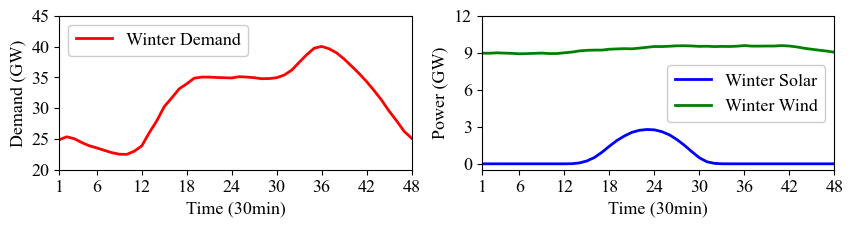

In [9]:
plt.figure(figsize=(10, 2))
x = range(48)
text1 = 13
text2 = 13
font1 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text2}

plt.subplot(121)
plt.plot(x, Demand_Winter_Daily_Mean, linewidth=2, color='r', label='Winter Demand')
plt.tick_params(labelsize = text1)
plt.xlim(0,47)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],[1,6,12,18,24,30,36,42,48])
plt.yticks(np.linspace(20000,45000,6), fontname = "Times New Roman")
plt.yticks([20000,25000,30000,35000,40000,45000],[20,25,30,35,40,45])
plt.xlabel('Time (30min)', font1)
plt.ylabel("Demand (GW)", font1)
legend = plt.legend(loc='upper left', prop=font1, framealpha=1, ncol=1)

plt.subplot(122)
plt.plot(x, PV_Winter_Daily_Mean, linewidth=2, color='b', label='Winter Solar')
plt.plot(x, WT_Winter_Daily_Mean, linewidth=2, color='g', label='Winter Wind')
plt.tick_params(labelsize = text1)
plt.xlim(0,47)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],[1,6,12,18,24,30,36,42,48])
plt.yticks(np.linspace(0,12000,5), fontname = "Times New Roman")
plt.yticks([0,3000,6000,9000,12000],[0,3,6,9,12])
plt.xlabel('Time (30min)', font1)
plt.ylabel("Power (GW)", font1)
legend = plt.legend(loc='lower right', prop=font1, framealpha=1, ncol=1, bbox_to_anchor=(1.00, 0.25))

plt.savefig('GBDemWTPV_Winter.jpg', dpi=1800, bbox_inches='tight')
plt.show()

# Export Summer and Winter Data to Excel

In [10]:
summer_data = np.array([Demand_Summer_Daily_Mean,WT_Summer_Daily_Mean,PV_Summer_Daily_Mean])
excel_summer_data = pd.DataFrame(summer_data)
with pd.ExcelWriter("summer_data.xlsx") as writer:
    excel_summer_data.to_excel(writer, sheet_name="dem_res", index=False)

In [11]:
winter_data = np.array([Demand_Winter_Daily_Mean,WT_Winter_Daily_Mean,PV_Winter_Daily_Mean])
excel_winter_data = pd.DataFrame(winter_data)
with pd.ExcelWriter("winter_data.xlsx") as writer:
    excel_winter_data.to_excel(writer, sheet_name="dem_res", index=False)

# Weekday and Weekend

In [12]:
Day_ID = pd.read_excel('2022_weekdays.xlsx').values[:,1] #2022-01-01 (Satuaday) to 2022-12-31 (Satuaday)

In [13]:
Demand_Workdays_Hour, Demand_Weekends_Hour = [], []
WT_Workdays_Hour, WT_Weekends_Hour = [], []
PV_Workdays_Hour, PV_Weekends_Hour = [], []

for d in range(len(Day_ID)):
    if Day_ID[d] == 6 or Day_ID[d] == 7:
        Demand_Weekends_Hour.append(Demand_Data_Day_Hour[d])
        WT_Weekends_Hour.append(WT_Data_Day_Hour[d])
        PV_Weekends_Hour.append(PV_Data_Day_Hour[d])
    else:
        Demand_Workdays_Hour.append(Demand_Data_Day_Hour[d])
        WT_Workdays_Hour.append(WT_Data_Day_Hour[d])
        PV_Workdays_Hour.append(PV_Data_Day_Hour[d])
        
Demand_Workdays_Hour = np.array(Demand_Workdays_Hour)
WT_Workdays_Hour = np.array(WT_Workdays_Hour)
PV_Workdays_Hour = np.array(PV_Workdays_Hour)
Demand_Weekends_Hour = np.array(Demand_Weekends_Hour)
WT_Weekends_Hour = np.array(WT_Weekends_Hour)
PV_Weekends_Hour = np.array(PV_Weekends_Hour)

In [14]:
Demand_Workdays_Daily_Mean = np.mean(Demand_Workdays_Hour, axis=0)
WT_Workdays_Daily_Mean = np.mean(WT_Workdays_Hour, axis=0)
PV_Workdays_Daily_Mean = np.mean(PV_Workdays_Hour, axis=0)
Demand_Weekends_Daily_Mean = np.mean(Demand_Weekends_Hour, axis=0)
WT_Weekends_Daily_Mean = np.mean(WT_Weekends_Hour, axis=0)
PV_Weekends_Daily_Mean = np.mean(PV_Weekends_Hour, axis=0)

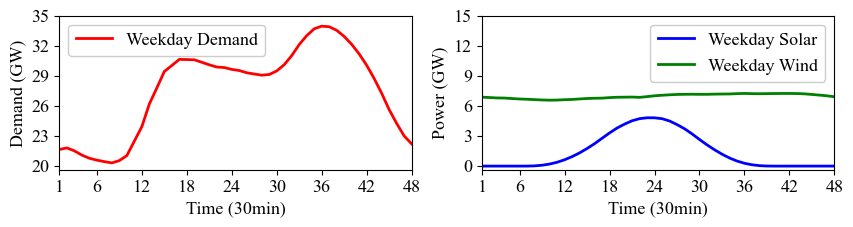

In [15]:
plt.figure(figsize=(10, 2))
x = range(48)
text1 = 13
text2 = 13
font1 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text2}

plt.subplot(121)
plt.plot(x, Demand_Workdays_Daily_Mean, linewidth=2, color='r', label='Weekday Demand')
plt.tick_params(labelsize = text1)
plt.xlim(0,47)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],[1,6,12,18,24,30,36,42,48])
plt.yticks(np.linspace(20000,35000,6), fontname = "Times New Roman")
plt.yticks([20000,23000,26000,29000,32000,35000],[20,23,26,29,32,35])
plt.xlabel('Time (30min)', font1)
plt.ylabel("Demand (GW)", font1)
legend = plt.legend(loc='upper left', prop=font1, framealpha=1, ncol=1)

plt.subplot(122)
plt.plot(x, PV_Workdays_Daily_Mean, linewidth=2, color='b', label='Weekday Solar')
plt.plot(x, WT_Workdays_Daily_Mean, linewidth=2, color='g', label='Weekday Wind')
plt.tick_params(labelsize = text1)
plt.xlim(0,47)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],[1,6,12,18,24,30,36,42,48])
plt.yticks(np.linspace(0,15000,6), fontname = "Times New Roman")
plt.yticks([0,3000,6000,9000,12000,15000],[0,3,6,9,12,15])
plt.xlabel('Time (30min)', font1)
plt.ylabel("Power (GW)", font1)
legend = plt.legend(loc='upper right', prop=font1, framealpha=1, ncol=1)

plt.savefig('GBDemWTPV_Workdays.jpg', dpi=1800, bbox_inches='tight')
plt.show()

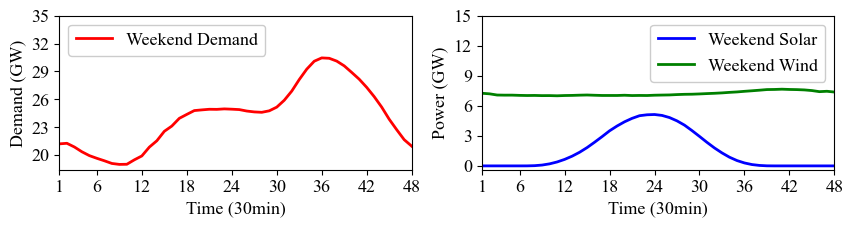

In [16]:
plt.figure(figsize=(10, 2))
x = range(48)
text1 = 13
text2 = 13
font1 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text2}

plt.subplot(121)
plt.plot(x, Demand_Weekends_Daily_Mean, linewidth=2, color='r', label='Weekend Demand')
plt.tick_params(labelsize = text1)
plt.xlim(0,47)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],[1,6,12,18,24,30,36,42,48])
plt.yticks(np.linspace(20000,35000,6), fontname = "Times New Roman")
plt.yticks([20000,23000,26000,29000,32000,35000],[20,23,26,29,32,35])
plt.xlabel('Time (30min)', font1)
plt.ylabel("Demand (GW)", font1)
legend = plt.legend(loc='upper left', prop=font1, framealpha=1, ncol=1)

plt.subplot(122)
plt.plot(x, PV_Weekends_Daily_Mean, linewidth=2, color='b', label='Weekend Solar')
plt.plot(x, WT_Weekends_Daily_Mean, linewidth=2, color='g', label='Weekend Wind')
plt.tick_params(labelsize = text1)
plt.xlim(0,47)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],[1,6,12,18,24,30,36,42,48])
plt.yticks(np.linspace(0,15000,6), fontname = "Times New Roman")
plt.yticks([0,3000,6000,9000,12000,15000],[0,3,6,9,12,15])
plt.xlabel('Time (30min)', font1)
plt.ylabel("Power (GW)", font1)
legend = plt.legend(loc='upper right', prop=font1, framealpha=1, ncol=1)

plt.savefig('GBDemWTPV_Weekends.jpg', dpi=1800, bbox_inches='tight')
plt.show()

# Export Weekday and Weekend Data to Excel

In [17]:
workday_data = np.array([Demand_Workdays_Daily_Mean,WT_Workdays_Daily_Mean,PV_Workdays_Daily_Mean])
excel_workday_data = pd.DataFrame(workday_data)
with pd.ExcelWriter("workday_data.xlsx") as writer:
    excel_workday_data.to_excel(writer, sheet_name="dem_res", index=False)

In [18]:
weekend_data = np.array([Demand_Weekends_Daily_Mean,WT_Weekends_Daily_Mean,PV_Weekends_Daily_Mean])
excel_weekend_data = pd.DataFrame(weekend_data)
with pd.ExcelWriter("weekend_data.xlsx") as writer:
    excel_weekend_data.to_excel(writer, sheet_name="dem_res", index=False)

# Summer(July), Winter(January)

In [19]:
Demand_Summer_Hour = Demand_Data_Day_Hour[181:212,:]
WT_Summer_Hour = WT_Data_Day_Hour[181:212,:]
PV_Summer_Hour = PV_Data_Day_Hour[181:212,:]
Demand_Winter_Hour = Demand_Data_Day_Hour[:31,:]
WT_Winter_Hour = WT_Data_Day_Hour[:31,:]
PV_Winter_Hour = PV_Data_Day_Hour[:31,:]

In [20]:
Demand_Summer_Daily_Mean = np.mean(Demand_Summer_Hour, axis=0)
WT_Summer_Daily_Mean = np.mean(WT_Summer_Hour, axis=0)
PV_Summer_Daily_Mean = np.mean(PV_Summer_Hour, axis=0)
Demand_Winter_Daily_Mean = np.mean(Demand_Winter_Hour, axis=0)
WT_Winter_Daily_Mean = np.mean(WT_Winter_Hour, axis=0)
PV_Winter_Daily_Mean = np.mean(PV_Winter_Hour, axis=0)

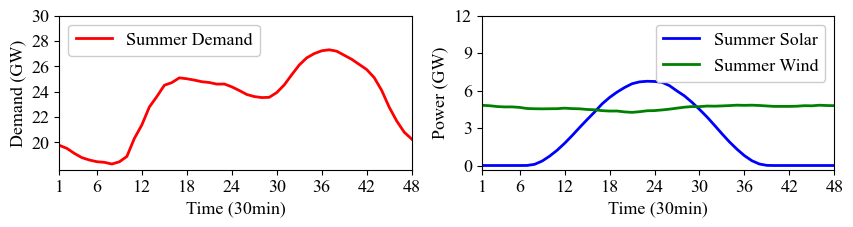

In [21]:
plt.figure(figsize=(10, 2))
x = range(48)
text1 = 13
text2 = 13
font1 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text2}

plt.subplot(121)
plt.plot(x, Demand_Summer_Daily_Mean, linewidth=2, color='r', label='Summer Demand')
plt.tick_params(labelsize = text1)
plt.xlim(0,47)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],[1,6,12,18,24,30,36,42,48])
plt.yticks(np.linspace(20000,30000,6), fontname = "Times New Roman")
plt.yticks([20000,22000,24000,26000,28000,30000],[20,22,24,26,28,30])
plt.xlabel('Time (30min)', font1)
plt.ylabel("Demand (GW)", font1)
legend = plt.legend(loc='upper left', prop=font1, framealpha=1, ncol=1)

plt.subplot(122)
plt.plot(x, PV_Summer_Daily_Mean, linewidth=2, color='b', label='Summer Solar')
plt.plot(x, WT_Summer_Daily_Mean, linewidth=2, color='g', label='Summer Wind')
plt.tick_params(labelsize = text1)
plt.xlim(0,47)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],[1,6,12,18,24,30,36,42,48])
plt.yticks(np.linspace(0,12000,5), fontname = "Times New Roman")
plt.yticks([0,3000,6000,9000,12000],[0,3,6,9,12])
plt.xlabel('Time (30min)', font1)
plt.ylabel("Power (GW)", font1)
legend = plt.legend(loc='upper right', prop=font1, framealpha=1, ncol=1)

#plt.savefig('GBDemWTPV_Summer.jpg', dpi=1800, bbox_inches='tight')
plt.show()

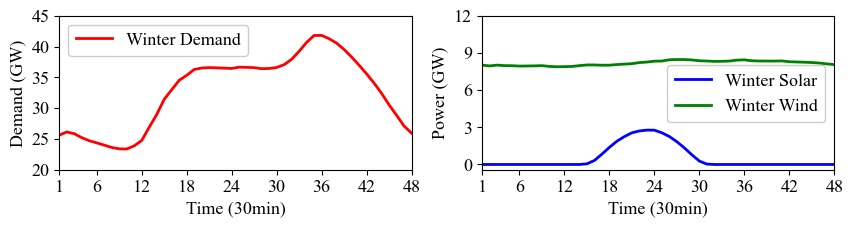

In [22]:
plt.figure(figsize=(10, 2))
x = range(48)
text1 = 13
text2 = 13
font1 = {'family': 'Times New Roman', 'weight': 'normal', 'size': text2}

plt.subplot(121)
plt.plot(x, Demand_Winter_Daily_Mean, linewidth=2, color='r', label='Winter Demand')
plt.tick_params(labelsize = text1)
plt.xlim(0,47)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],[1,6,12,18,24,30,36,42,48])
plt.yticks(np.linspace(20000,45000,6), fontname = "Times New Roman")
plt.yticks([20000,25000,30000,35000,40000,45000],[20,25,30,35,40,45])
plt.xlabel('Time (30min)', font1)
plt.ylabel("Demand (GW)", font1)
legend = plt.legend(loc='upper left', prop=font1, framealpha=1, ncol=1)

plt.subplot(122)
plt.plot(x, PV_Winter_Daily_Mean, linewidth=2, color='b', label='Winter Solar')
plt.plot(x, WT_Winter_Daily_Mean, linewidth=2, color='g', label='Winter Wind')
plt.tick_params(labelsize = text1)
plt.xlim(0,47)
plt.xticks(np.linspace(0,47,11), fontname = "Times New Roman")
plt.xticks([0,5,11,17,23,29,35,41,47],[1,6,12,18,24,30,36,42,48])
plt.yticks(np.linspace(0,12000,5), fontname = "Times New Roman")
plt.yticks([0,3000,6000,9000,12000],[0,3,6,9,12])
plt.xlabel('Time (30min)', font1)
plt.ylabel("Power (GW)", font1)
legend = plt.legend(loc='lower right', prop=font1, framealpha=1, ncol=1, bbox_to_anchor=(1.00, 0.25))

#plt.savefig('GBDemWTPV_Winter.jpg', dpi=1800, bbox_inches='tight')
plt.show()